In [1]:
import pandas as pd
data1 = pd.read_csv("C:/Users/satya/Downloads/pca_dataset.csv")
print(data1.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   Feature_7  Feature_8  Feature_9  Feature_10    Label  
0   1.579213   0.767435  -0.469474    0.542560  Class_A  
1  -1.012831   0.314247  -0.908024   -1.412304  Class_B  
2  -1.150994   0.375698  -0.600639   -0.291694  Class_A  
3   0.208864  -1.959670  -1.328186    0.196861  Class_C  
4  -0.460639   1.057122   0.343618   -1.763040  Class_C  


In [2]:
# Assume 'Class' column contains categorical labels
features = data1.drop('Label', axis=1)  # Drop label column for PCA
labels = data1['Label']  # Store labels for visualization

print("\nNumeric features used for PCA:\n", features.head())
print("\nLabels (Class):\n", labels.head())



Numeric features used for PCA:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   Feature_7  Feature_8  Feature_9  Feature_10  
0   1.579213   0.767435  -0.469474    0.542560  
1  -1.012831   0.314247  -0.908024   -1.412304  
2  -1.150994   0.375698  -0.600639   -0.291694  
3   0.208864  -1.959670  -1.328186    0.196861  
4  -0.460639   1.057122   0.343618   -1.763040  

Labels (Class):
 0    Class_A
1    Class_B
2    Class_A
3    Class_C
4    Class_C
Name: Label, dtype: object


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric data
x = StandardScaler().fit_transform(features)
print("\nStandardized Data Sample:\n", x[:5])


Standardized Data Sample:
 [[ 0.4659452  -0.16668555  0.68735224  1.55399815 -0.24148728 -0.2376667
   1.52902652  0.76508767 -0.46304616  0.54104958]
 [-0.47624831 -0.49803734  0.28122065 -1.91242409 -1.71901041 -0.55937256
  -1.02347525  0.31445026 -0.89646547 -1.49747117]
 [ 1.41677702 -0.25523613  0.10661233 -1.41961106 -0.5489611   0.10061604
  -1.15953001  0.37555517 -0.59267604 -0.32890551]
 [-0.61195355  1.84748059  0.02550595 -1.04935748  0.80582516 -1.20499495
   0.17958226 -1.94667235 -1.31171217  0.18055684]
 [ 0.70318092  0.14662174 -0.07674715 -0.28612015 -1.47480312 -0.7138349
  -0.47970671  1.05314515  0.34053453 -1.86321714]]


In [4]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(x)

# Create DataFrame for 2D representation
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = labels  # Add class label for coloring in visualization

print("\nPCA Reduced Data with Labels:\n", pca_df.head())



PCA Reduced Data with Labels:
         PC1       PC2    Class
0  0.343936  0.972640  Class_A
1  0.714788 -0.873108  Class_B
2  0.079845  0.208499  Class_A
3  2.060682  0.314278  Class_C
4 -0.311969  0.396790  Class_C


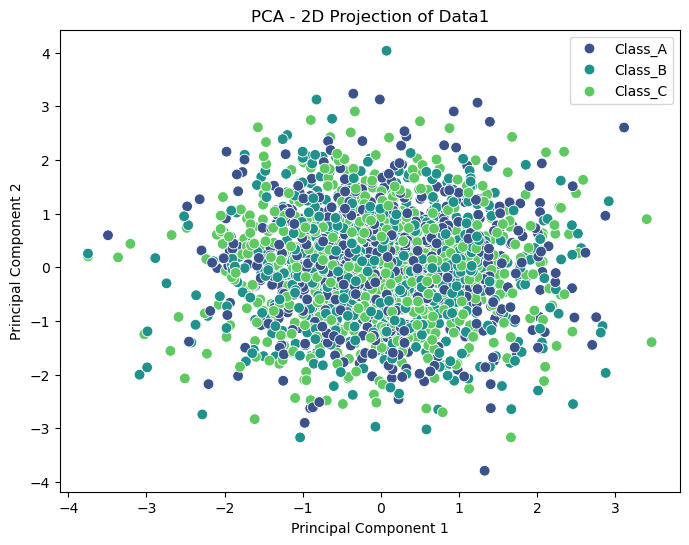

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot colored by class labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Class', palette='viridis', s=60)
plt.title('PCA - 2D Projection of Data1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Task 2

In [7]:
data2 = pd.read_csv("C:/Users/satya/Downloads/stock_prices.csv")
print(data2.head())

         Date    Open   Close  Volume
0  2018-01-01  137.45  132.68    5713
1  2018-01-02  195.07  190.01    4092
2  2018-01-03  173.20  181.33    5159
3  2018-01-04  159.87  154.86    7308
4  2018-01-05  115.60  111.04    8478


In [8]:
# Convert 'Date' to datetime and set as index
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)

# Check for missing values
print("\nMissing Values in Data2:\n", data2.isnull().sum())

# Fill missing values if necessary
data2.fillna(method='ffill', inplace=True)  # Forward fill

# Display cleaned data
print("\nCleaned Data2:")
print(data2.head())



Missing Values in Data2:
 Open      0
Close     0
Volume    0
dtype: int64

Cleaned Data2:
              Open   Close  Volume
Date                              
2018-01-01  137.45  132.68    5713
2018-01-02  195.07  190.01    4092
2018-01-03  173.20  181.33    5159
2018-01-04  159.87  154.86    7308
2018-01-05  115.60  111.04    8478


C:\Users\satya\AppData\Local\Temp\ipykernel_7660\991472740.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2.fillna(method='ffill', inplace=True)  # Forward fill


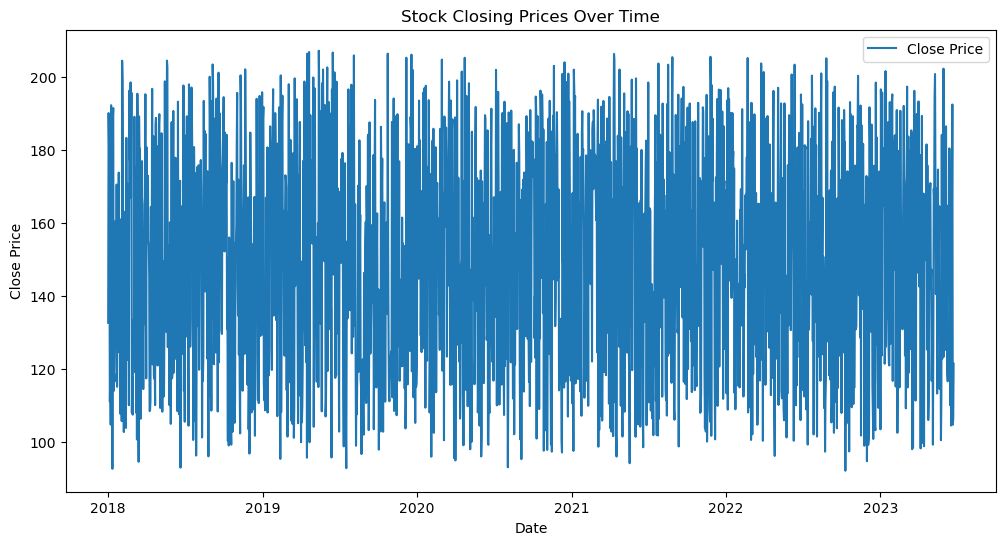

In [9]:
# Plot closing prices to observe trends
plt.figure(figsize=(12, 6))
plt.plot(data2['Close'], label='Close Price')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [10]:
# Create lag feature
data2['Lag_Close'] = data2['Close'].shift(1)

# Rolling window (moving average)
data2['MA_5'] = data2['Close'].rolling(window=5).mean()

# Drop NaN values created due to shifting/rolling
data2.dropna(inplace=True)

print("\nData2 with Features:")
print(data2.head())



Data2 with Features:
              Open   Close  Volume  Lag_Close     MA_5
Date                                                  
2018-01-05  115.60  111.04    8478     154.86  153.984
2018-01-06  115.60  120.79    9476     111.04  151.606
2018-01-07  105.81  104.80    5933     120.79  134.564
2018-01-08  186.62  192.15    5926     104.80  136.728
2018-01-09  160.11  151.42    4969     192.15  136.040


In [11]:
from pmdarima import auto_arima

# Auto ARIMA to find best (p,d,q)
stepwise_model = auto_arima(data2['Close'], start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            start_P=0, seasonal=False,
                            d=None, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print("\nBest ARIMA parameters:", stepwise_model.order)


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\s

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25740.040, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=20547.346, Time=0.07 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23926.593, Time=0.28 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=20000.665, Time=0.28 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.90 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.56 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=19223.582, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19221.755, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19219.954, Time=0.08 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=19221.759, Time=0.32 sec


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=19223.763, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 6.287 seconds

Best ARIMA parameters: (0, 0, 0)


C:\Users\satya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\satya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\satya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


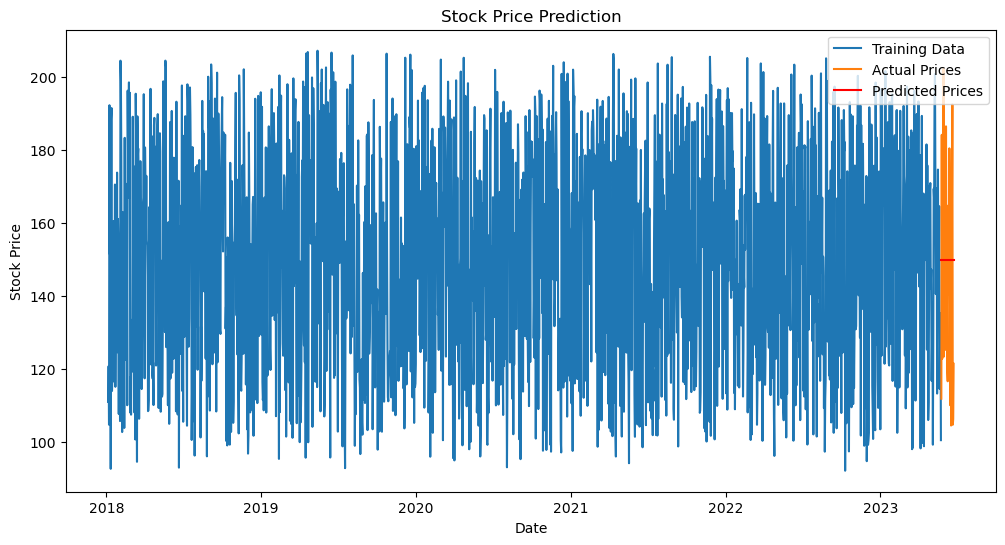

In [12]:
# Split data for training and testing (e.g., last 30 days as test set)
train = data2['Close'][:-30]
test = data2['Close'][-30:]

# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=stepwise_model.order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
forecast = pd.Series(forecast, index=test.index)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices')
plt.plot(forecast, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [13]:
# Error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("\nMean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")



Mean Absolute Error (MAE): 26.384213242803096
Root Mean Squared Error (RMSE): 29.595663463348583
Mean Absolute Percentage Error (MAPE): 19.129258591637786 %
